In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
strt = pd.read_csv(r"C:\Users\Admin\Downloads\50_Startup.csv")
strt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
strt.shape

(50, 5)

In [6]:
# Creating the dummies for discrete dataset of "State"

In [7]:
dummies = pd.get_dummies(strt['State'])
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [8]:
strt = pd.concat([strt,dummies],axis=1)         # Combining the dummies with the dataset
strt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [9]:
strt= strt.drop("State",axis=1)                    
strt.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
# Renaming the columns for convinience 

In [11]:
strt = strt.rename(columns= {"R&D Spend":"RD_spnd", "Administration":"Admin", "Marketing Spend":"Mark_sp", "New York":"New_york"})
strt.columns

Index(['RD_spnd', 'Admin', 'Mark_sp', 'Profit', 'California', 'Florida',
       'New_york'],
      dtype='object')

In [12]:
# Correlation matrix

In [13]:
strt.corr()

,RD_spnd,Admin,Mark_sp,Profit,California,Florida,New_york
RD_spnd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Mark_sp,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
New_york,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [14]:
# There exists some collinearity between input variables especially between RD_spnd and Mark_sp

In [15]:
import seaborn as sns

In [16]:
# Scatter plot between the variables along with histograms

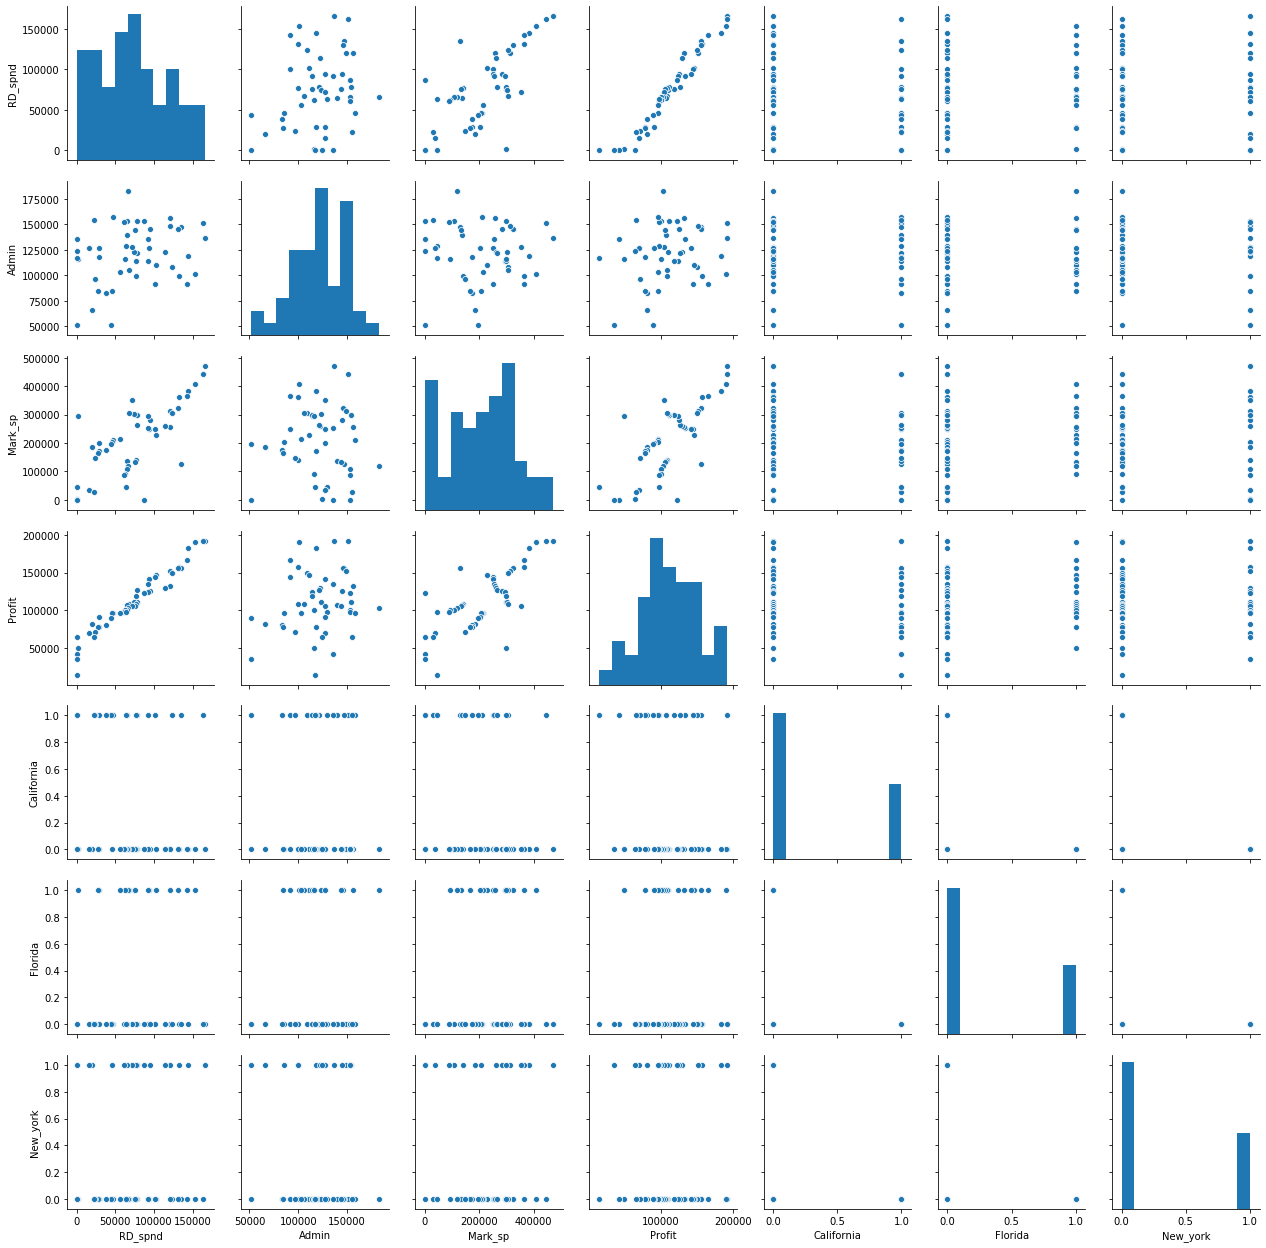

In [17]:
sns.pairplot(strt)

In [18]:
strt.columns              # columns names

Index(['RD_spnd', 'Admin', 'Mark_sp', 'Profit', 'California', 'Florida',
       'New_york'],
      dtype='object')

In [19]:
import statsmodels.formula.api as smf

In [20]:
# preparing model considering all the variables 

In [21]:
ml1 = smf.ols("Profit~RD_spnd+Admin+Mark_sp+California+Florida+New_york", data=strt).fit()
ml1.summary()                   # Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        00:10:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_spnd        0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
Mark_sp        0.0270      0.017      1.574      0.123      -0.008       0.062
California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
New_york    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.61e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
# p-values for market_spnd and Admin are more than 0.05 

In [23]:
ml1.params       # Getting coefficients of variables

Intercept     37633.233317
RD_spnd           0.806023
Admin            -0.027004
Mark_sp           0.026980
California    12492.110514
Florida       12690.899307
New_york      12450.223495
dtype: float64

In [24]:
# preparing model based only on Admin

In [25]:
ml_ad = smf.ols("Profit~Admin", data=strt).fit()
ml_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 13 Aug 2020   Prob (F-statistic):              0.162
Time:                        00:10:56   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# preparing model based only on Market_spnd

In [27]:
ml_ms = smf.ols("Profit~Mark_sp", data=strt).fit()
ml_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           4.38e-10
Time:                        00:10:57   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Mark_sp        0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# preparing model based on Market_spnd and Admin

In [29]:
ml_ma = smf.ols("Profit~Mark_sp+Admin", data=strt).fit()

In [30]:
ml_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.50e-10
Time:                        00:10:57   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Mark_sp        0.2488      0.030      8.281      0.000       0.188       0.309
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Both coefficients p-value became significant, but with RD_spnd only one of the variable can be considered

In [32]:
# preparing model based on Market_spnd and RD_spnd

In [33]:
ml_rm = smf.ols("Profit~Mark_sp+RD_spnd", data=strt).fit()
ml_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.16e-31
Time:                        00:10:57   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Mark_sp        0.0299      0.016      1.927      0.060      -0.001       0.061
RD_spnd        0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Mark_spnd p-value became insignificant when it is used along with RD_spnd, the reason is high-collinearity between both

In [35]:
# preparing model based on Admin and RD_spnd

In [36]:
ml_ra = smf.ols("Profit~Admin+RD_spnd", data=strt).fit()
ml_ra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           7.29e-31
Time:                        00:10:58   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
RD_spnd        0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Admin p-value became insignificant when it is used along with RD_spnd

In [38]:
import statsmodels.api as sm

In [39]:
# Checking whether data has any influential values 

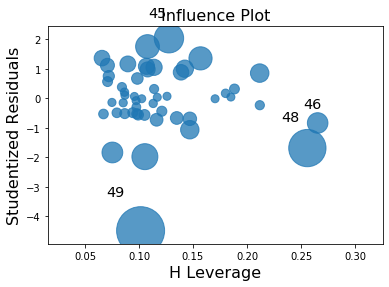

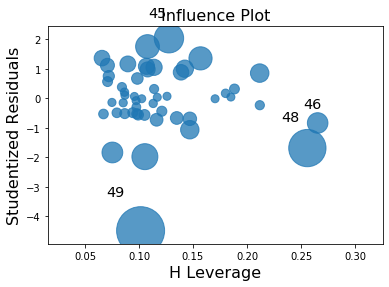

In [40]:
sm.graphics.influence_plot(ml1)                          # influence index plots

In [41]:
# index 48 AND 49 is showing high influence so we can exclude that entire row

In [42]:
strt_new = strt.drop(strt.index[[48,49]],axis=0)
strt_new.head()

,RD_spnd,Admin,Mark_sp,Profit,California,Florida,New_york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [43]:
# Preparing new model 

In [44]:
ml_new = smf.ols("Profit~RD_spnd+Admin+Mark_sp", data=strt_new).fit()
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           2.03e-31
Time:                        00:11:00   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD_spnd        0.7895      0.036     21.718      0.000       0.716       0.863
Admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
Mark_sp        0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
ml_new.params               # Getting coefficients of variables

Intercept    59098.493334
RD_spnd          0.789495
Admin           -0.063349
Mark_sp          0.016895
dtype: float64

In [46]:
print(ml_new.conf_int(0.01))             # for 99% confidence interval

                      0             1
Intercept  43169.061426  75027.925242
RD_spnd        0.691625      0.887366
Admin         -0.181598      0.054900
Mark_sp       -0.019536      0.053325


In [47]:
# predicted values of profit

In [48]:
pred = ml_new.predict(strt_new)
pred

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [49]:
# calculating VIF's values of independent variables

In [50]:
rsq_rd = smf.ols("RD_spnd~Admin+Mark_sp", data=strt_new).fit().rsquared

In [51]:
vif_rd = 1/(1-rsq_rd)
vif_rd

2.2509719174188128

In [52]:
rsq_ad = smf.ols("Admin~RD_spnd+Mark_sp", data=strt_new).fit().rsquared

In [53]:
vif_ad = 1/(1-rsq_ad)
vif_ad

1.1960162915170802

In [54]:
rsq_ms = smf.ols("Mark_sp~RD_spnd+Admin", data=strt_new).fit().rsquared

In [55]:
vif_ms = 1/(1-rsq_ms)
vif_ms

2.229867174093624

In [56]:
# Storing vif values in a data frame

In [57]:
d1 = {"Variables":["RD_spnd","Mark_sp","Admin"], "VIF":[vif_rd,vif_ms,vif_ad]}

In [58]:
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RD_spnd,2.250972
1,Mark_sp,2.229867
2,Admin,1.196016


In [59]:
# all the variables has low VIF values

In [60]:
# Added varible plot 

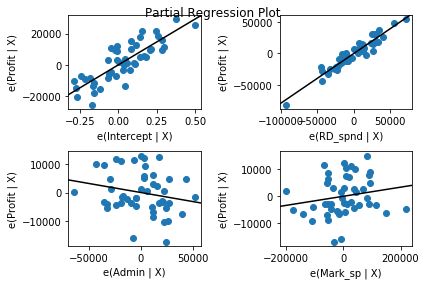

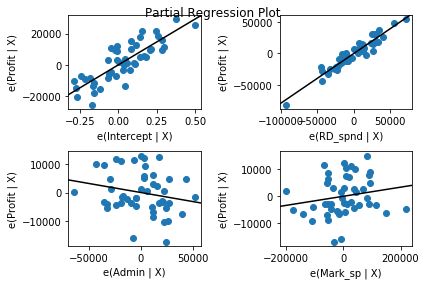

In [61]:
sm.graphics.plot_partregress_grid(ml_new)

In [62]:
# added varible plot for Mark_spnd is not showing much significance, hence it is excluded

In [63]:
# final model

In [64]:
final_ml = smf.ols("Profit~RD_spnd+Admin",data=strt_new).fit()  
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.62e-32
Time:                        00:11:03   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RD_spnd        0.8229      0.025     33.245      0.000       0.773       0.873
Admin         -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# For final model the r-squared value has increased.

In [66]:
final_ml.params       # Getting coefficients of variables

Intercept    62734.700114
RD_spnd          0.822911
Admin           -0.083726
dtype: float64

In [67]:
final_pred = final_ml.predict(strt_new)   # Predicted values
final_pred

0     187340.464760
1     183863.887641
2     180534.893139
3     171604.420272
4     172024.525403
5     162900.562346
6     161186.859951
7     157773.804230
8     149478.810965
9     155129.052073
10    137340.484516
11    137893.497963
12    129316.175141
13    127091.776815
14    148330.209061
15    146711.212589
16    116751.658144
17    128482.338848
18    128676.601621
19    120997.283316
20    115951.175950
21    114367.406052
22    113345.516501
23    109453.840824
24    117822.625592
25    104263.757333
26    112655.711034
27    111367.236568
28    101797.017449
29    103909.390855
30    104068.445347
31    100259.360216
32    104095.492902
33     99772.679489
34     87736.121850
35     93479.452221
36     75684.497649
37     94706.610663
38     73860.287242
39     87517.154120
40     76471.551735
41     78595.585990
42     74135.495344
43     64829.306456
44     68023.684692
45     53162.943051
46     54120.360089
47     51395.923989
dtype: float64

In [68]:
final_pred.corr(strt_new.Profit)

0.980486749741788

In [69]:
# added variable plot for the final model

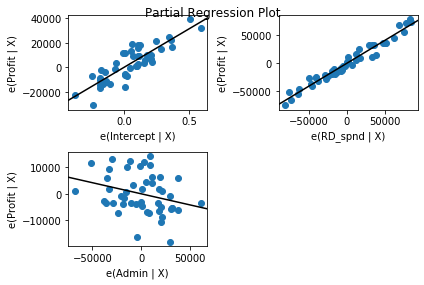

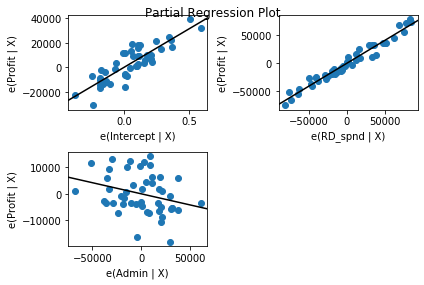

In [70]:
sm.graphics.plot_partregress_grid(final_ml)

Text(0, 0.5, 'Fitted values')

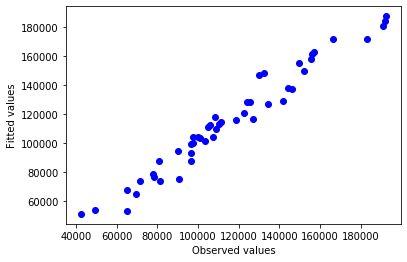

In [71]:
plt.scatter(strt_new.Profit, final_pred, c="b"); plt.xlabel("Observed values");plt.ylabel("Fitted values")
# Plot showing Observed values VS Fitted values

Text(0, 0.5, 'residuals')

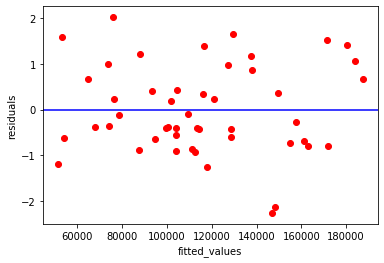

In [72]:
plt.scatter(final_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")
# PLot showing Residuals VS Fitted Values

(array([ 2.,  0.,  2., 12.,  9.,  5.,  6.,  4.,  6.,  2.]),
 array([-2.27105796, -1.84078838, -1.41051881, -0.98024923, -0.54997965,
        -0.11971007,  0.31055951,  0.74082908,  1.17109866,  1.60136824,
         2.03163782]),
 <a list of 10 Patch objects>)

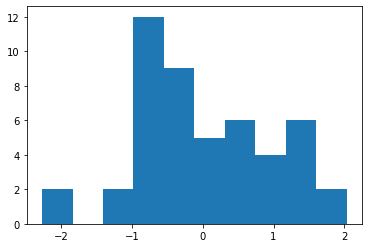

In [73]:
plt.hist(final_ml.resid_pearson)            # histogram of standardized residuals

In [74]:
import pylab
import scipy.stats as st

In [75]:
# QQ plot for residuals 

((array([-2.18794508, -1.81466696, -1.5940389 , -1.43152593, -1.29991017,
         -1.18761792, -1.08858668, -0.99921942, -0.91719469, -0.84091983,
         -0.76924975, -0.7013297 , -0.63650166, -0.57424545, -0.51414026,
         -0.45583845, -0.39904728, -0.34351563, -0.28902427, -0.23537844,
         -0.18240202, -0.12993297, -0.07781945, -0.02591656,  0.02591656,
          0.07781945,  0.12993297,  0.18240202,  0.23537844,  0.28902427,
          0.34351563,  0.39904728,  0.45583845,  0.51414026,  0.57424545,
          0.63650166,  0.7013297 ,  0.76924975,  0.84091983,  0.91719469,
          0.99921942,  1.08858668,  1.18761792,  1.29991017,  1.43152593,
          1.5940389 ,  1.81466696,  2.18794508]),
  array([-2.27105796, -2.12682096, -1.25365136, -1.19490904, -0.93607777,
         -0.90165956, -0.88052885, -0.85991083, -0.79912756, -0.78927519,
         -0.72605657, -0.68484662, -0.64334766, -0.62605721, -0.59631922,
         -0.55861114, -0.42082821, -0.41304135, -0.40484289, -

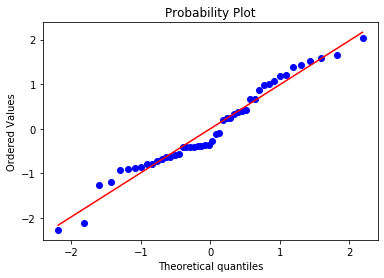

In [76]:
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)

In [77]:
# Looking at the QQ-plot and scatter plot, the final model performs well with high R_square value and significant p-values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Splitting the data into train and test data 

In [80]:
strt_train, strt_test = train_test_split(strt_new,test_size=0.2)

In [81]:
strt_train.shape

(38, 7)

In [82]:
strt_test.shape

(10, 7)

In [83]:
# preparing the model on train data 

In [84]:
model_train = smf.ols("Profit~RD_spnd+Admin", data=strt_new).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.62e-32
Time:                        00:11:08   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RD_spnd        0.8229      0.025     33.245      0.000       0.773       0.873
Admin         -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
train_pred = model_train.predict(strt_train)   # train_data prediction

In [86]:
train_resid = train_pred - strt_train.Profit

In [87]:
# RMSE value of train data

In [88]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

7482.651451872763

In [89]:
test_pred = model_train.predict(strt_test)     # test_data prediction

In [90]:
test_resid = test_pred- strt_test.Profit

In [91]:
# RMSE value of test data

In [92]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

5772.002589590072